In [1]:
import tarfile
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import cv2

In [2]:
# Extract file
file = tarfile.open('/kaggle/input/lfw-data/lfw-funneled.tgz')
file.extractall("/kaggle/working/")
file.close()

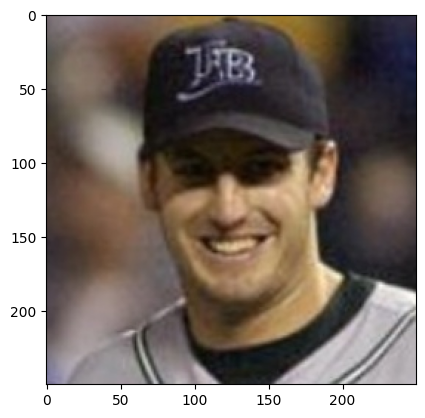

In [3]:
# Preview first image
base_image_path = "/kaggle/working/lfw_funneled/"
dir_names = os.listdir(base_image_path)
first_image_name = os.listdir(base_image_path + dir_names[0])
np_img = np.asarray(Image.open(base_image_path + dir_names[0] + "/" + first_image_name[0]))
plt.imshow(np_img)
# plt.xlabel(first_image_name[1])

In [4]:
print(f"Number of Candidates: {len(dir_names)}")
counter = 0
for dir_name in dir_names:
    try:
        file_names = os.listdir(base_image_path + dir_name)
        for file_name in file_names:
            counter += 1
    except:
        continue
print(f"Number of Files: {counter}")

Number of Candidates: 5760
Number of Files: 13233


In [5]:
# Display RGB Image
# fig, axs = plt.subplots(1,3,figsize=(15, 5))
# axs[0].imshow(np_img[:,:,0], cmap='Reds')
# axs[1].imshow(np_img[:,:,1], cmap='Greens')
# axs[2].imshow(np_img[:,:,2], cmap='Blues')
# axs[0].set_title("Red Channel")
# axs[1].set_title("Green Channel")
# axs[2].set_title("Blue Channel")
# plt.show()


In [6]:
# Read image using matplotlib and cv2
# plt_img = plt.imread(base_image_path + dir_names[0] + "/" + first_image_name[0])
# cv2_img = cv2.imread(base_image_path + dir_names[0] + "/" + first_image_name[0])
# fig, axs = plt.subplots(1,2,figsize=(15,5))
# axs[0].imshow(plt_img)
# axs[1].imshow(cv2_img)
# axs[0].set_title("Image from matplotlib")
# axs[1].set_title("Image from cv2")
# plt.show()

In [7]:
# Convert BGR to RGB in cv2
# cv2_img_rgb = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)
# plt.imshow(cv2_img_rgb)

In [8]:
#Convert Image to gray_scale
# cv2_img_gray = cv2.cvtColor(plt_img, cv2.COLOR_RGB2GRAY)
# plt.imshow(cv2_img_gray, cmap="Greys")

In [9]:
# Apply Resizing for image
# cv2_img_resized = cv2.resize(plt_img, None, fx=0.50, fy=0.50)
# plt.imshow(cv2_img_resized)
# print(cv2_img_resized.flatten().shape)

In [10]:
# Apply PCA for image
# pca = PCA(n_components=15)
# img_pca = pca.fit_transform(plt_img.mean(axis=2))
# img_pca_projection = pca.inverse_transform(img_pca)
# print(f"RAW Image: {plt_img.flatten().shape}")
# print(f"Image after applying PCA: {img_pca_projection.flatten().shape}")
# plt.imshow(img_pca_projection)

In [11]:
# Image Segmentation by K-mean Clustering for the first image with 16 colors
# from sklearn.cluster import KMeans
# X = np_img.reshape(-1, 3)
# Kmeans = KMeans(n_clusters=16,n_init=10)
# Kmeans.fit(X)
# segmented_img = Kmeans.cluster_centers_[Kmeans.labels_]
# segmented_img = segmented_img.reshape(np_img.shape)
# segmented_img = segmented_img/255
# plt.imshow(segmented_img)
# print(f"Image after clustered with 16 colors: {segmented_img.flatten().shape}")


In [12]:
# Combined Resized and PCA
# img_pca = pca.fit_transform(cv2_img_resized.mean(axis=2))
# img_pca_projection = pca.inverse_transform(img_pca)
# print(f"RAW Image: {plt_img.flatten().shape}")
# print(f"Image after applying Resized and PCA: {img_pca_projection.flatten().shape}")
# plt.imshow(img_pca_projection)

In [13]:
# Combined Resized, K-means clusttering 16 colors, PCA

# cv2_img_resized = cv2.resize(segmented_img, None, fx=0.50, fy=0.50)
# img_pca = pca.fit_transform(cv2_img_resized.mean(axis=2))
# img_pca_projection = pca.inverse_transform(img_pca)
# print(f"RAW Image: {plt_img.flatten().shape}")
# print(f"Image after applying Resized, K-means clusttering 16 colors, PCA: {img_pca_projection.flatten().shape}")
# plt.imshow(img_pca_projection ,cmap="Greys")



In [14]:
# sns.histplot(plt_img.flatten())

In [15]:
# img_cropped = plt_img[30:, 30:, :]
# # plt.imshow(img_cropped)
# sns.histplot(img_cropped.flatten())

In [16]:
# face_cascade = cv2.CascadeClassifier('/kaggle/input/haarcascade-frontalface-default/haarcascade_frontalface_default.xml')
# gray_img = cv2.cvtColor(plt_img, cv2.COLOR_RGB2GRAY)
# faces = face_cascade.detectMultiScale(gray_img, 1.1, 1)
# new_img = np.zeros_like(plt_img)
# for (x,y,w,h) in faces:
#     img = plt_img[x:x+w, y:y+h]
#     new_img[x:x+w, y:y+h, :] = plt_img[x:x+w, y:y+h, :]
# plt.imshow(new_img)
# plt.show()
    

In [17]:
#Compare the differences of image before and after apply face detection

# img = plt.imread(base_image_path + dir_names[0] + "/" + first_image_name[0])
# # convert img to grayscale
# img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# # Apply face detection
# face_cascade = cv2.CascadeClassifier('/kaggle/input/haarcascade-frontalface-default/haarcascade_frontalface_default.xml')
# new_img = np.zeros_like(img)
# faces = face_cascade.detectMultiScale(img, 1.1, 1)
# for (x,y,w,h) in faces:
#     new_img[x:x+w, y:y+h] = img[x:x+w, y:y+h]

# # Apply StandardScaler
# scaler = StandardScaler()

# img_scaled = scaler.fit_transform(img.reshape(-1,1))
# new_img_scaled = scaler.fit_transform(new_img.reshape(-1,1))

# fx,ax = plt.subplots(1,2)
# ax[0].hist(img_scaled)
# ax[1].hist(new_img_scaled)
# plt.show()

# print(f"Mean before: {np.mean(img_scaled)}, Std before:{np.std(img_scaled)}")
# print(f"Mean after: {np.mean(new_img_scaled)}, Std after:{np.std(new_img_scaled)}")



In [18]:
# Choosing Image Resize + Image Cropping + Grayscale + Face Detection
images = []
targets = []
face_cascade = cv2.CascadeClassifier('/kaggle/input/haarcascade-frontalface-default/haarcascade_frontalface_default.xml')
for dir_name in dir_names:
    counter = 0
    try:
        file_names = os.listdir(base_image_path + dir_name)
        if(len(file_names) >= 20):
            for file_name in file_names:
                counter = counter + 1
                if counter >= 200:
                    break
                img = plt.imread(f"{base_image_path}{dir_name}/{file_name}")
                try:
                    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                    faces = face_cascade.detectMultiScale(gray_img, 1.1, 1)
                    for (x,y,w,h) in faces:
                        if len(img[x:x+w, y:y+h].flatten()) < 43200 :
                           break
#                         img = img[x:x+w, y:y+h]
#                         new_img[x:x+w, y:y+h] = img[x:x+w, y:y+h]
#                     img = new_img[30:220, 30:220]
                    img = img[50:200, 50:200]
                    if(len(np.unique(img)) > 200):
#                         img = cv2.resize(img, None, fx=0.75, fy=0.75)
#                         img = cv2.resize(img, (90,90), interpolation = cv2.INTER_AREA)
#                         hist, bins = np.histogram(img.flatten(), 256, [0, 256])
#                         cdf = hist.cumsum()
#                         cdf_normalized = cdf * hist.max() / cdf.max(),
#                         cdf_m = np.ma.masked_equal(cdf, 0)
#                         cdf_m = (cdf_m - cdf_m.min())*255 / (cdf_m.max()-cdf_m.min())
#                         cdf = np.ma.filled(cdf_m, 0).astype('uint8')
#                         img = cdf[img]
                        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                        images.append(img)
                        targets.append(dir_name)
                except:
                    continue         
    except:
        continue
print(f"Number of images: {len(images)}")
print(f"Number of identities: {len(np.unique(targets))}")


Number of images: 2642
Number of identities: 62


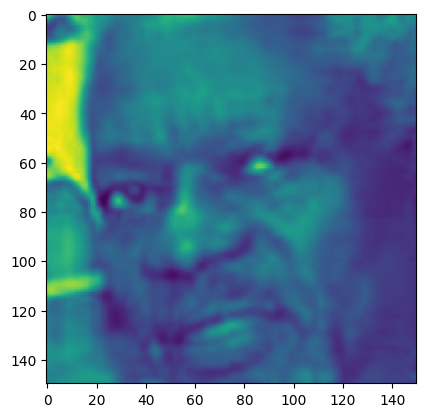

In [19]:
# Preview a random image
plt.imshow(images[0])

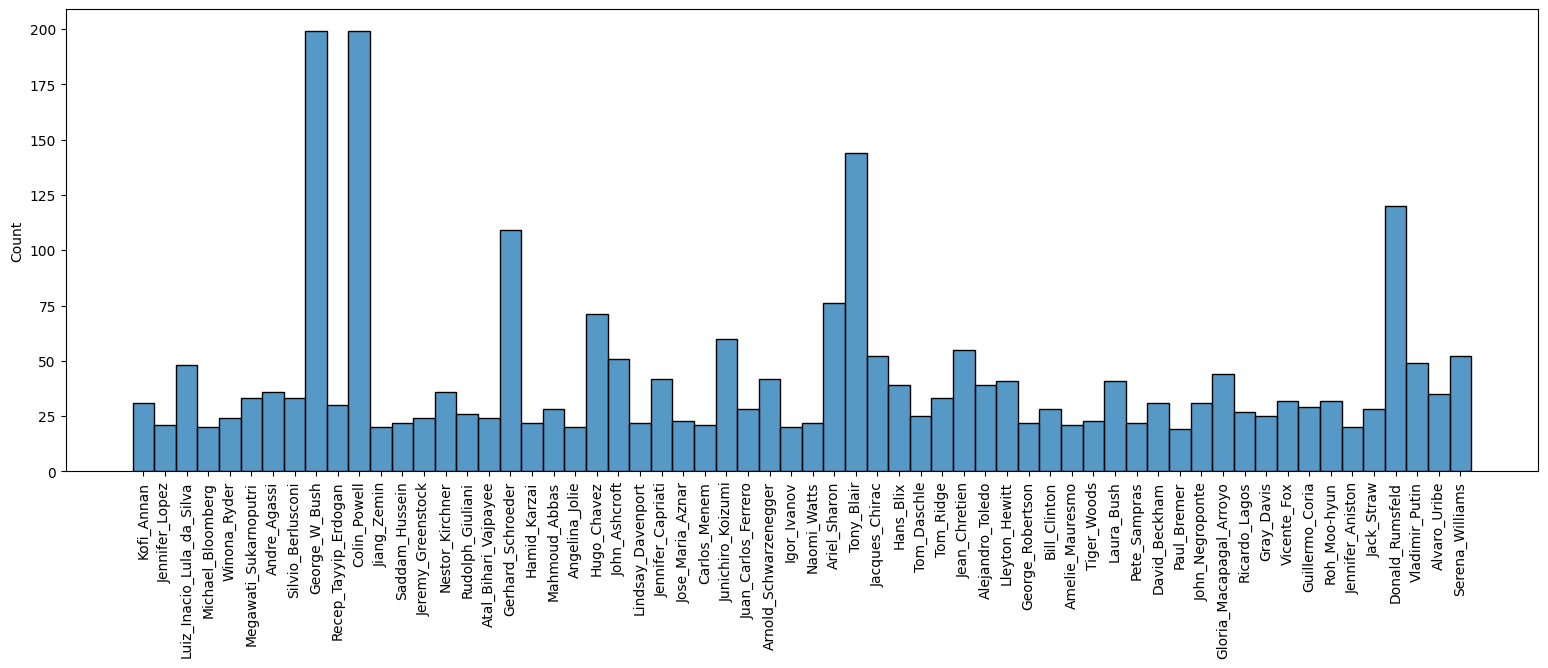

In [20]:
# Check Identity Count

plt.figure(figsize=(19,6))
sns.histplot(targets)
plt.xticks(rotation=90, fontsize=10)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
images_train, images_test, targets_train, targets_test = train_test_split(images, targets, random_state=42, stratify=targets, test_size=0.2)
print(f"Number of train images: {len(images_train)}")
print(f"Number of train identities: {len(np.unique(targets_train))}")
print(f"Number of test images: {len(images_test)}")
print(f"Number of test identities: {len(np.unique(targets_test))}")

Number of train images: 2113
Number of train identities: 62
Number of test images: 529
Number of test identities: 62


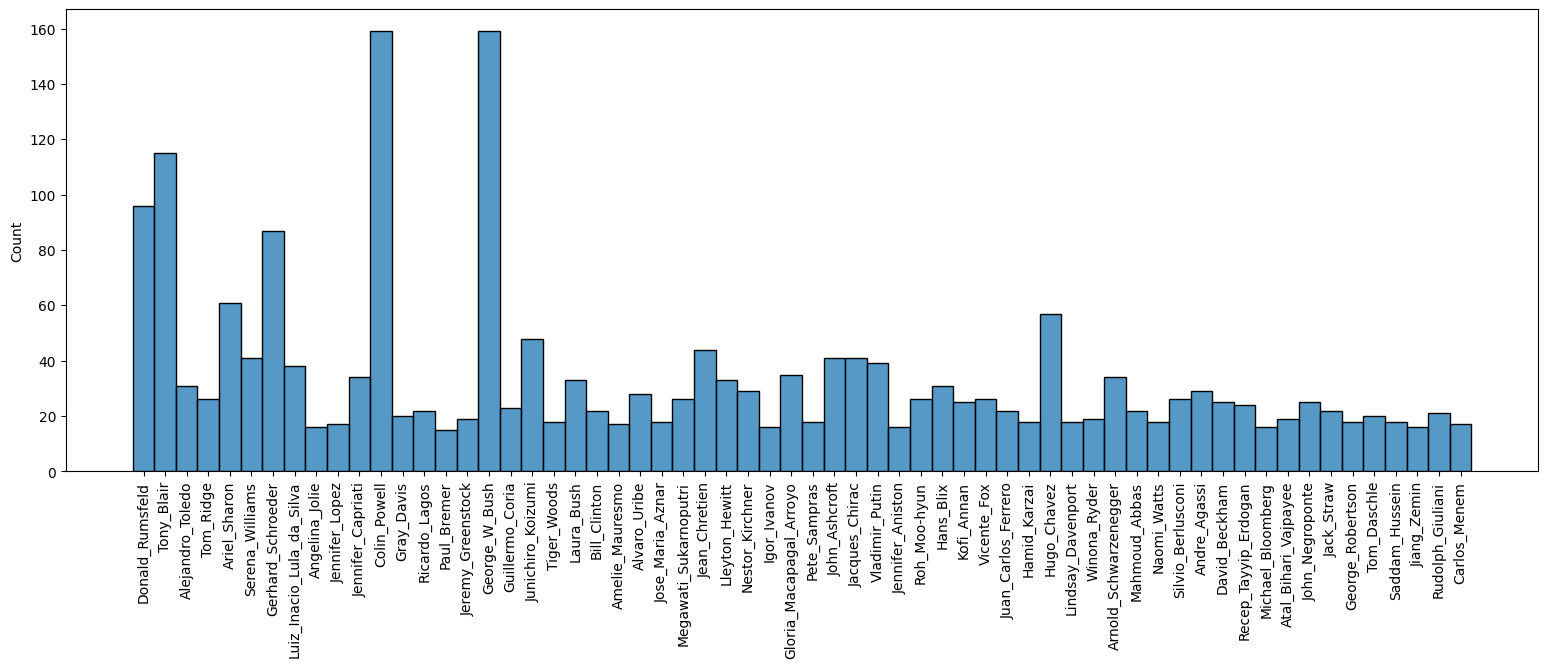

In [22]:
# Check Identity Count for image training set

plt.figure(figsize=(19,6))
sns.histplot(targets_train)
plt.xticks(rotation=90, fontsize=10)
plt.show()

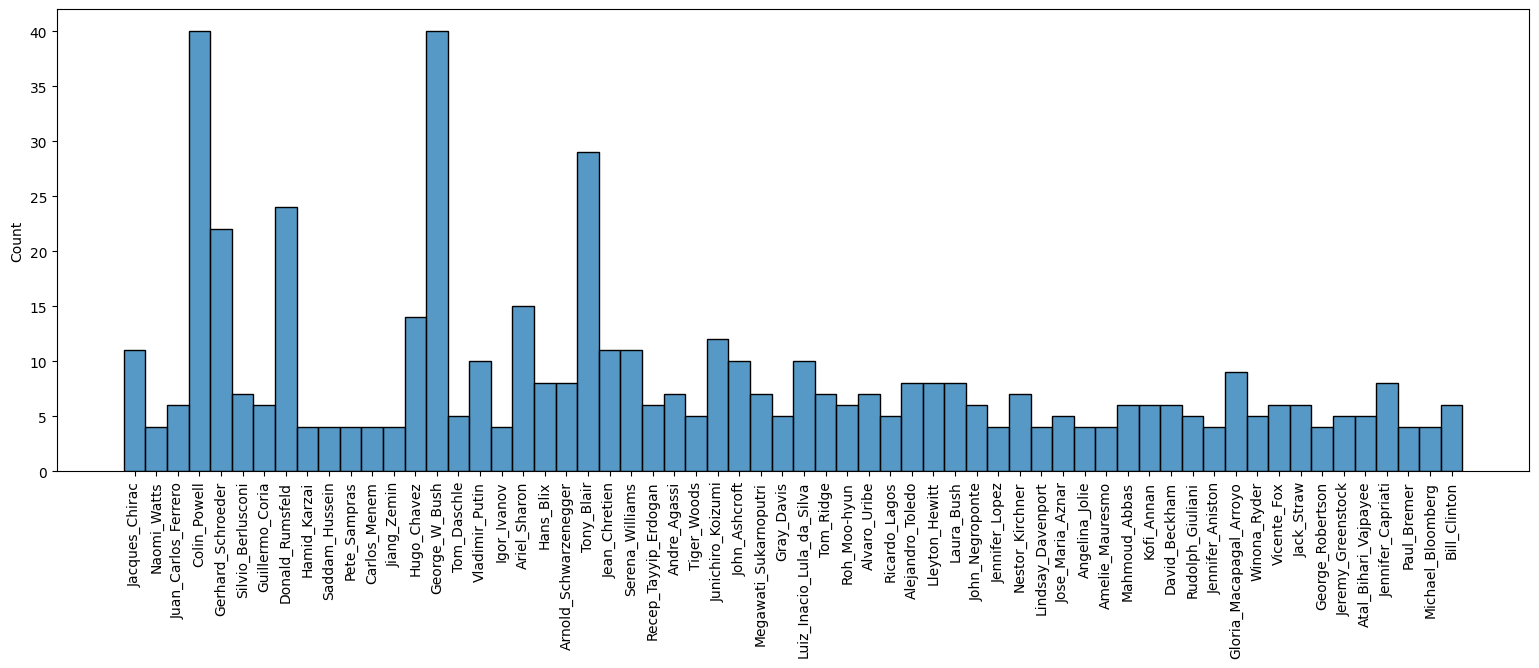

In [23]:
# Check Identity Count for image test set

plt.figure(figsize=(19,6))
sns.histplot(targets_test)
plt.xticks(rotation=90, fontsize=10)
plt.show()

In [24]:
#Apply Image Augmentation to train set

import random
import imgaug as ia
import imgaug.augmenters as iaa

hflip= iaa.Fliplr(p=1.0)
vflip= iaa.Flipud(p=1.0) 
rot = iaa.Affine(rotate=(random.randint(-180,180), random.randint(-180,180)))

target, counts = np.unique(targets_train, return_counts=True)
indentity_count = list(zip(counts, target))
image_with_name = list(zip(images_train, targets_train))

for ic in indentity_count:
    if(ic[0] < 50):
        for iwn in image_with_name:
            if(ic[1] == iwn[1]):
                for i in [hflip, vflip, rot]:
                    if(i != rot):
                        _img = i.augment_image(iwn[0])
                        images_train.append(_img)
                        targets_train.append(iwn[1])
                    else:
                        for count in range(1):
                            _img = i.augment_image(iwn[0])
                            images_train.append(_img)
                            targets_train.append(iwn[1])
    elif (ic[0] >= 50 and ic[0] < 100):
        for iwn in image_with_name:
            if(ic[1] == iwn[1]):
                for i in [hflip, vflip, rot]:
                    if(i != rot):
                        _img = i.augment_image(iwn[0])
                        images_train.append(_img)
                        targets_train.append(iwn[1])
                    else:
                        for count in range(0):
                            _img = i.augment_image(iwn[0])
                            images_train.append(_img)
                            targets_train.append(iwn[1])
print(f"Number of train images after augmentation: {len(images_train)}")
print(f"Number of train total target after augmentation: {len(targets_train)}")
print(f"Number of train identities after augmentation: {len(np.unique(targets_train))}")

Number of train images after augmentation: 6852
Number of train total target after augmentation: 6852
Number of train identities after augmentation: 62


In [25]:
#Apply Image Augmentation to test set

# target, counts = np.unique(targets_test, return_counts=True)
# indentity_count = list(zip(counts, target))
# image_with_name = list(zip(images_test, targets_test))

# for ic in indentity_count:
#     if(ic[0] < 5):
#         for iwn in image_with_name:
#             if(ic[1] == iwn[1]):
#                 for i in [hflip, vflip, rot]:
#                     if(i != rot):
#                         _img = i.augment_image(iwn[0])
#                         images_test.append(_img)
#                         targets_test.append(iwn[1])
#                     else:
#                         for count in range(1):
#                             _img = i.augment_image(iwn[0])
#                             images_test.append(_img)
#                             targets_test.append(iwn[1])
#     elif (ic[0] >= 5 and ic[0] < 10):
#         for iwn in image_with_name:
#             if(ic[1] == iwn[1]):
#                 for i in [hflip, vflip]:
#                     _img = i.augment_image(iwn[0])
#                     images_test.append(_img)
#                     targets_test.append(iwn[1])
# print(f"Number of test images after augmentation: {len(images_test)}")
# print(f"Number of test total target after augmentation: {len(targets_test)}")
# print(f"Number of test identities after augmentation: {len(np.unique(targets_test))}")

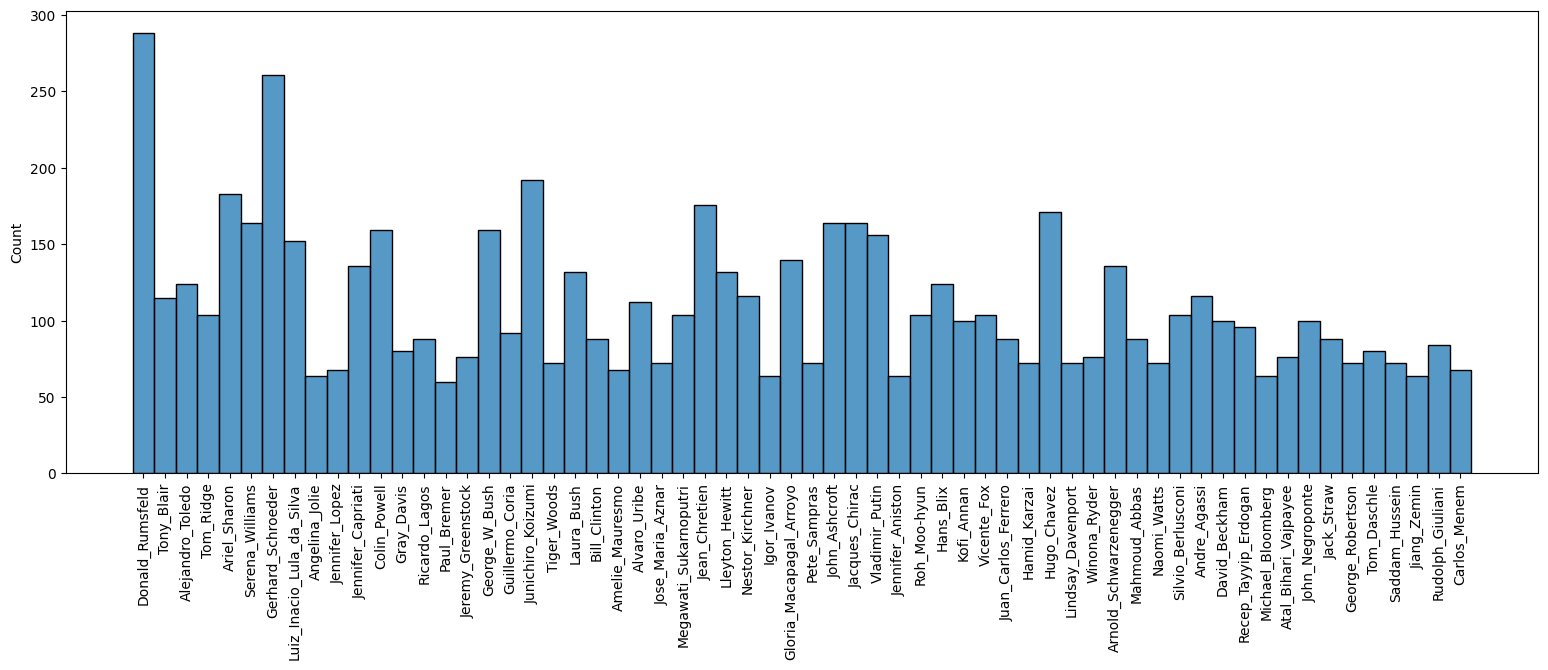

In [26]:
# Check Identity Count after apply augmentation for image training set

plt.figure(figsize=(19,6))
sns.histplot(targets_train)
plt.xticks(rotation=90, fontsize=10)
plt.show()

In [27]:
# Check Identity Count after apply augmentation for image test set

# plt.figure(figsize=(19,6))
# sns.histplot(targets_test)
# plt.xticks(rotation=90, fontsize=10)
# plt.show()

In [28]:
# Convert from train images python list to numpy array

new_images = []
for image in images_train:
    new_images.append(image.flatten())
images_train = np.asarray(new_images)
targets_train = np.asarray(targets_train)

In [29]:
# Convert from test images python list to numpy array

new_images = []
for image in images_test:
    new_images.append(image.flatten())
images_test = np.asarray(new_images)
targets_test = np.asarray(targets_test)

Donald_Rumsfeld


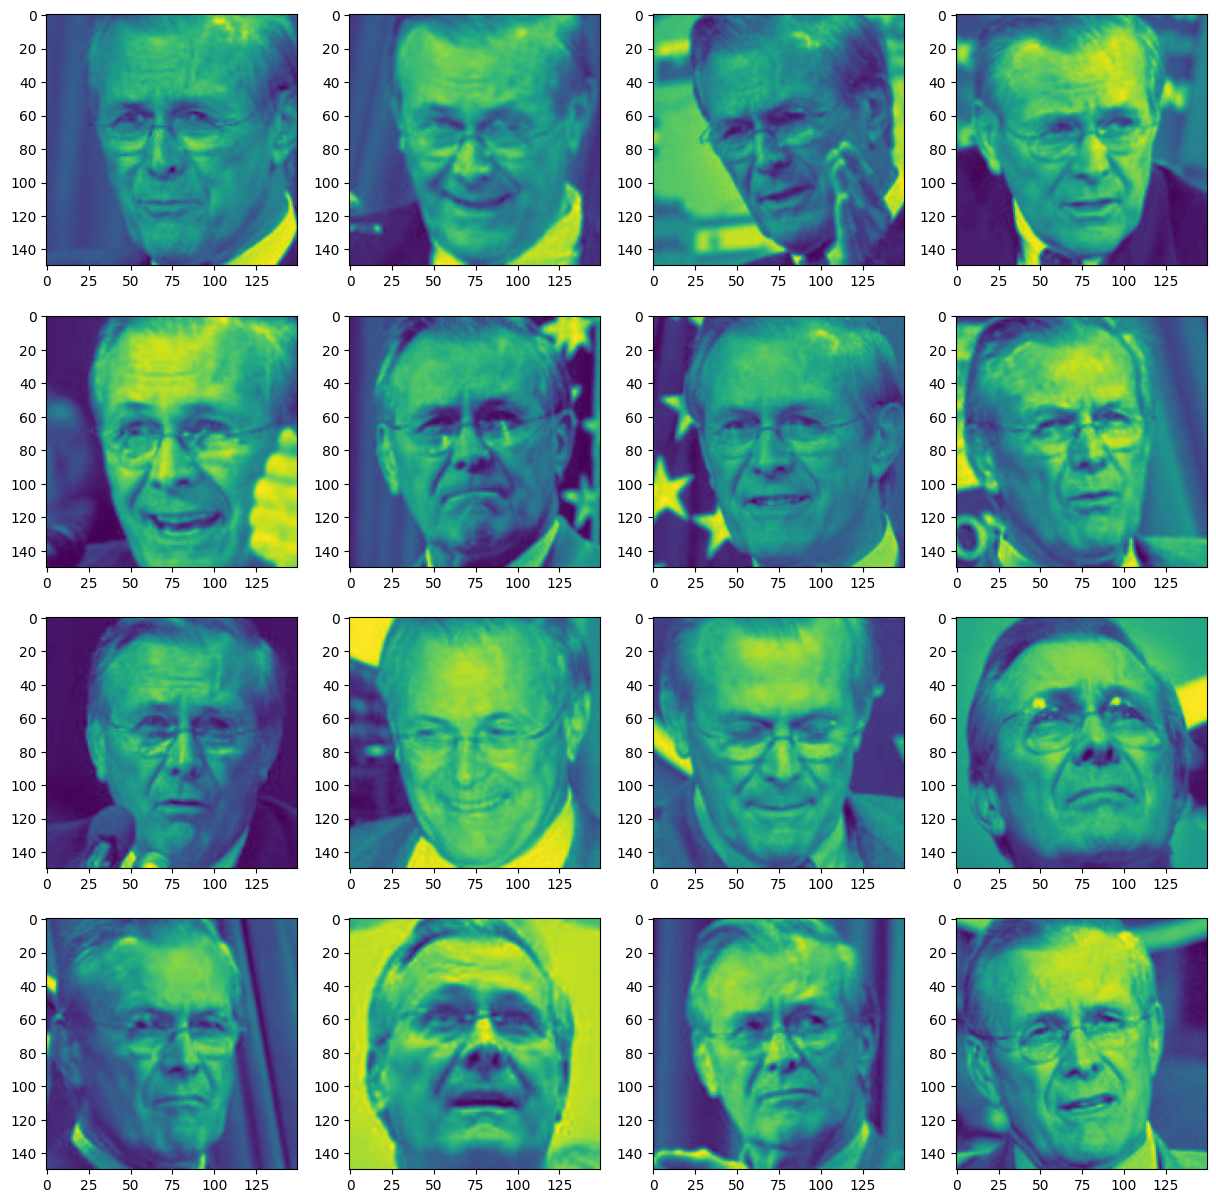

In [30]:
# Vitualize a random identity after agumentation from training set

zipped_image_00 = zip(images_train, targets_train)
counter = 0
fig,axs = plt.subplots(4, 4, figsize=(15, 15))
row=0
col=0
for (image, target) in zipped_image_00:
    try:
        if(target == targets_train[0]):
            axs[row, col].imshow(image.reshape(150, 150))
            col = col +1
            if (col == 4):
                row = row + 1
                col = 0
    except:
        continue
print(targets_train[0])

In [31]:
# Vitualize a random identity after agumentation from testing set

# zipped_image_00 = zip(images_test, targets_test)
# counter = 0
# fig,axs = plt.subplots(4, 4, figsize=(15, 15))
# row=0
# col=0
# for (image, target) in zipped_image_00:
#     try:
#         if(target == targets_test[0]):
#             axs[row, col].imshow(image.reshape(190, 190))
#             col = col +1
#             if (col == 4):
#                 row = row + 1
#                 col = 0
#     except:
#         continue
# targets_test[0]

In [32]:
# Apply MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler
# minmax_scaler = MinMaxScaler()
# images_scaled = minmax_scaler.fit_transform(images_scaled)

In [33]:
# Apply StandardScaler to both training and testing set
scaler = StandardScaler()
scaler = scaler.fit(images_train, targets_train)
images_train_scaled = scaler.transform(images_train)
images_test_scaled = scaler.transform(images_test)

Mean: 0.781046829112766
Standard Diviation: 0.7180148920406083


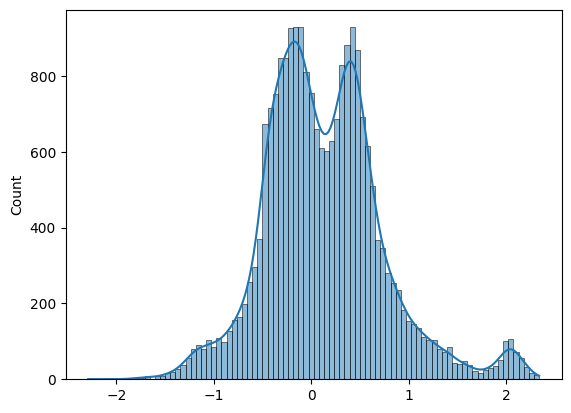

In [34]:
# Check an images traing set after scaled
sns.histplot(images_train_scaled[0], kde=True)

# Check Mean and Std after applying Standardscaler (Mean ~ 0, Standard Diviation ~ 1)
print(f"Mean: {np.mean(images_train_scaled[1])}")
print(f"Standard Diviation: {np.std(images_train_scaled[1])}")

In [35]:
# Apply Principle Component Analysis with 95% of variance radio to both train and test

pca = PCA(0.95)
pca = pca.fit(images_train_scaled, targets_train)
images_train_pca = pca.transform(images_train_scaled)
images_test_pca = pca.transform(images_test_scaled)
print(f"After apply PCA for train: overall data is in shape {images_train_pca.shape}")
print(f"After apply PCA for test: overall data is in shape {images_test_pca.shape}")

After apply PCA for train: overall data is in shape (6852, 372)
After apply PCA for test: overall data is in shape (529, 372)


In [36]:
# Apply LDA to both training and testing dataset

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda = lda.fit(images_train_pca, targets_train)
images_train_lda = lda.transform(images_train_pca)
images_test_lda = lda.transform(images_test_pca)
print(f"After apply LDA for train: overall data is in shape {images_train_lda.shape}")
print(f"After apply LDA for test: overall data is in shape {images_test_lda.shape}")

After apply LDA for train: overall data is in shape (6852, 61)
After apply LDA for test: overall data is in shape (529, 61)


In [37]:
#Apply K-Mean Cluster 16-colors
# from sklearn.cluster import KMeans
# Kmeans = KMeans(n_clusters=16,n_init=10)
# Kmeans.fit(X=images_pca)
# images_segmented = Kmeans.cluster_centers_[Kmeans.labels_]
# images_segmented.shape

In [38]:
# Convert numpy array to pandas dataframe

df = pd.DataFrame(images_train_pca, targets_train)
df.reset_index(inplace=True)
df.rename(columns={'index':'target'}, inplace=True)
df.head()

,target,0,1,2,3,4,5,6,7,8,...,362,363,364,365,366,367,368,369,370,371
0,Donald_Rumsfeld,23.664825,-1.843131,-48.101713,-1.136112,17.868632,-9.733655,18.474020,-13.817081,13.808861,...,-0.276943,1.173738,0.091433,-0.217600,0.165198,-0.639429,0.807567,0.075981,0.772346,-0.191853
1,Tony_Blair,118.783848,15.636983,-6.212145,-39.284672,7.591376,2.837273,16.860450,5.716318,17.777746,...,-1.629870,-0.808577,-3.059336,0.782950,-0.060903,1.050630,0.628096,-0.668546,1.830347,1.688877
2,Alejandro_Toledo,29.830366,53.409524,-7.661550,17.112278,-29.832384,19.722066,-24.884003,9.760902,-9.104951,...,2.206324,0.698476,1.028311,0.574179,-0.089757,-1.606328,-0.690793,-0.352464,0.876711,0.549704
3,Tom_Ridge,10.720643,57.087977,-34.003495,5.422875,4.549083,20.242553,-7.144517,94.539266,-6.666712,...,0.262346,-1.782507,-1.567032,0.572288,0.419916,-0.465428,-2.278234,3.103749,0.012215,0.992300
4,Ariel_Sharon,21.014022,-34.452636,-29.303071,-7.267131,41.597879,-8.120352,0.429446,0.844415,3.036578,...,1.487568,0.803135,-1.964607,1.645060,-1.400168,0.603547,-0.680364,-1.918044,-1.495332,-1.093415


In [39]:
# Split Data to features and target

X_train = df.drop('target', axis=1)
y_train = df['target']

#Check the counts of each identity

print(y_train.value_counts())

target
Donald_Rumsfeld      288
Gerhard_Schroeder    261
Junichiro_Koizumi    192
Ariel_Sharon         183
Jean_Chretien        176
                    ... 
Michael_Bloomberg     64
Igor_Ivanov           64
Jiang_Zemin           64
Angelina_Jolie        64
Paul_Bremer           60
Name: count, Length: 62, dtype: int64


In [40]:
# Balance Data by using UnderSampling Random Aproach (Not Apply)

# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(sampling_strategy="not minority")
# X_res, y_res = rus.fit_resample(X_train, y_train)

In [41]:
# Balance Data by using OverSampling RandomOverSampler Aproach 

# from imblearn.over_sampling import RandomOverSampler
# smote= RandomOverSampler(random_state=1, sampling_strategy="all")
# X_res, y_res = smote.fit_resample(X_train, y_train)

In [42]:
# Balance Data by using OverSampling SMOTE Aproach 

from imblearn.over_sampling import SMOTE
smote= SMOTE(random_state=1, sampling_strategy="all")
X_res, y_res = smote.fit_resample(X_train, y_train)

In [43]:
# Balance Data by using OverSampling ADASYN Aproach 

# from imblearn.over_sampling import ADASYN
# adasyn= ADASYN(random_state=1, sampling_strategy="all")
# X_res, y_res = adasyn.fit_resample(X_train, y_train)

In [44]:
# Balance Data by using OverSampling SVMSMOTE Aproach 

# from imblearn.over_sampling import SVMSMOTE
# svmsmote= SVMSMOTE(random_state=1, sampling_strategy="all")
# X_res, y_res = svmsmote.fit_resample(X_train, y_train)

Total images for model training: (17856,)


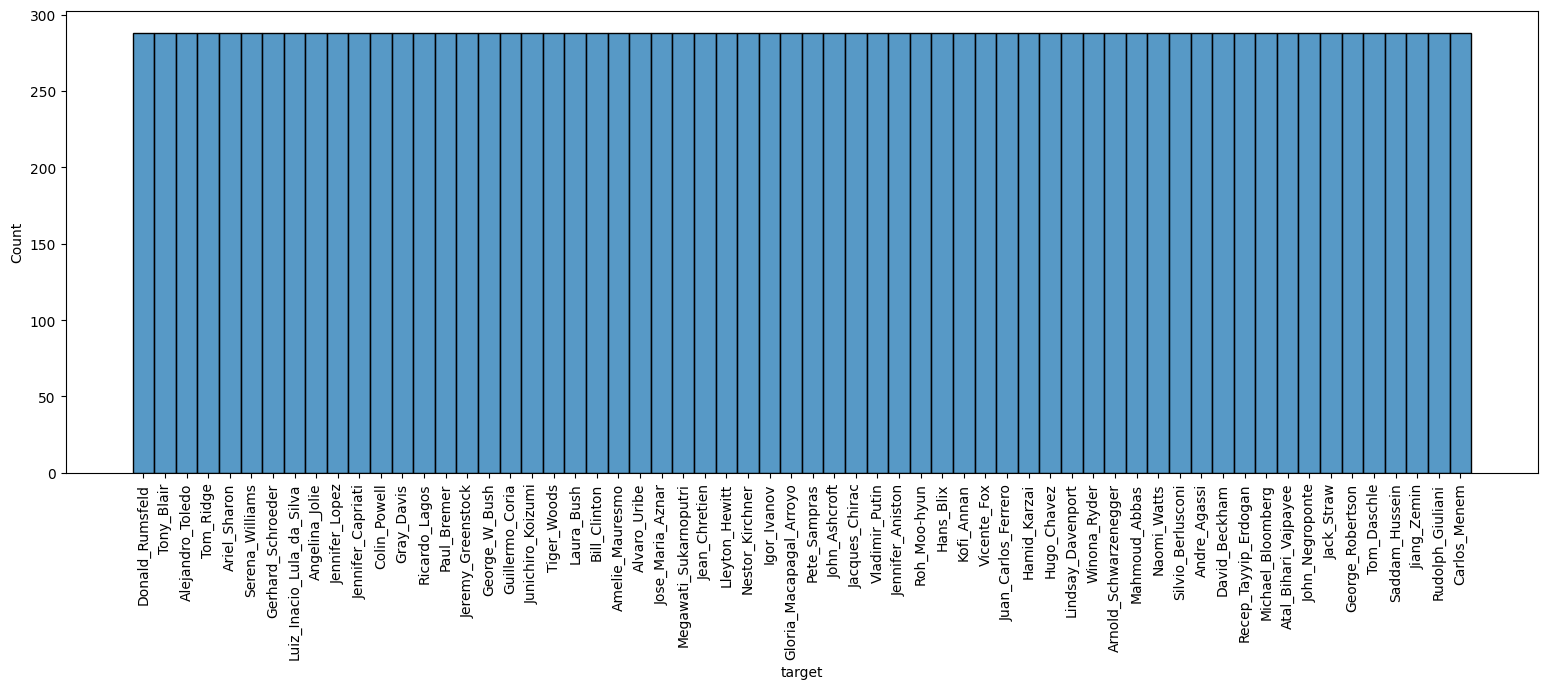

In [45]:
# Check the counts of each identity after applying over sampling technique

print(f"Total images for model training: {y_res.shape}")
plt.figure(figsize=(19,6))
sns.histplot(y_res)
plt.xticks(rotation=90, fontsize=10)
plt.show()

In [46]:
from sklearn import svm
clf = svm.SVC(class_weight='balanced',
 decision_function_shape='ovo',
 gamma='scale',
 kernel='linear',
probability=True)

In [47]:
# Fit model
clf.fit(X_res, y_res)

SVC(class_weight='balanced', decision_function_shape='ovo', kernel='linear',
    probability=True)

In [48]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(images_test_pca)
accuracy_score(targets_test, y_pred)

0.5255198487712666

In [49]:
# Apply 5 folds cross_validation
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(clf, X_res, y_res, cv=5)
# scores

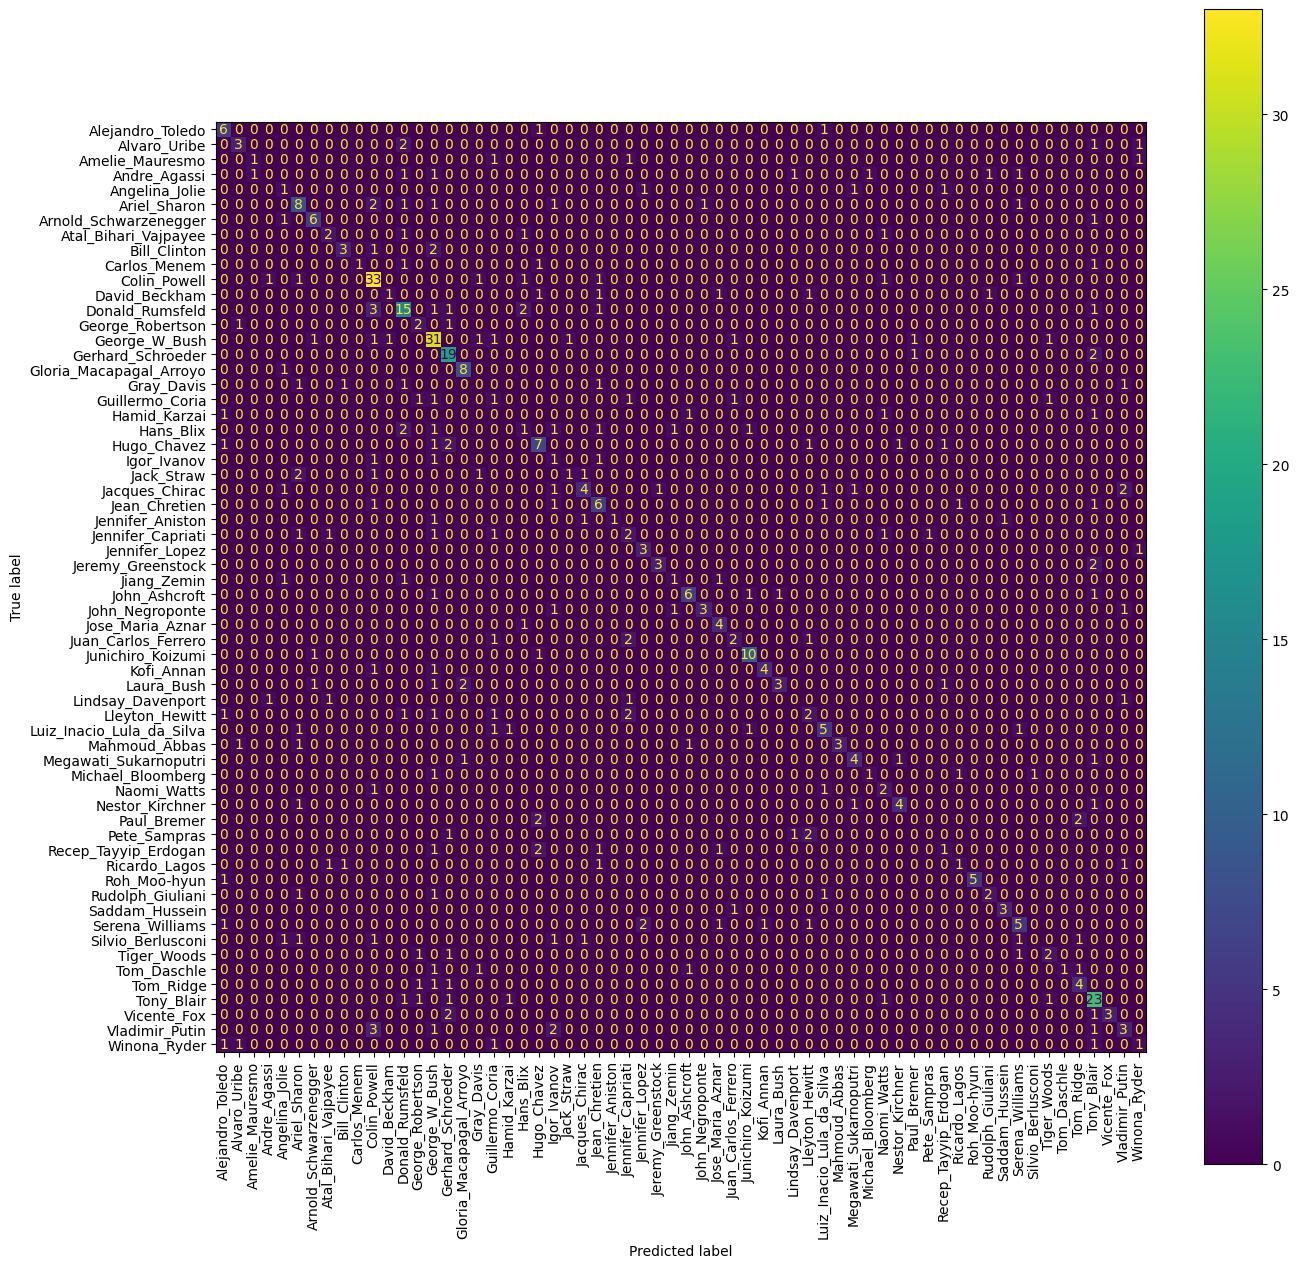

In [50]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
data = confusion_matrix(targets_test, y_pred)
data_display = ConfusionMatrixDisplay(confusion_matrix=data, display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(15,15))
data_display.plot(ax=ax)
plt.xticks(rotation=90)
plt.show()

In [51]:
pca.score(images_test_scaled, targets_test)

-5405.249921147074

In [52]:
# Precision Score
# from sklearn.metrics import precision_score
# print(f"Macro: {precision_score(targets_test, y_pred, average='macro')}")
# print(f"Micro: {precision_score(targets_test, y_pred, average='micro')}")
# print(f"Weighted: {precision_score(targets_test, y_pred, average='weighted')}")

In [53]:
# F1 Score
# from sklearn.metrics import f1_score
# print(f"Macro: {f1_score(y_test, y_pred, average='macro')}")
# print(f"Micro: {f1_score(y_test, y_pred, average='micro')}")
# print(f"Weighted: {f1_score(y_test, y_pred, average='weighted')}")

In [54]:
# Receiver Operator Characteristic (ROC) Area Under the Curve (AUC) 
# from sklearn.metrics import roc_auc_score
# roc_auc_score(y_res, clf.predict_proba(X_res), multi_class='ovo')

In [55]:
# Apply Grid Search to get the best params

from sklearn import svm
from sklearn.model_selection import GridSearchCV
params = {
    'kernel':('linear', 'poly', 'rbf'),
    'gamma': ('scale', 'auto'),
    'class_weight': ('balanced', None),
    'decision_function_shape': ('ovo', 'ovr')
}
grid_clf = GridSearchCV(estimator=svm.SVC(),param_grid=params)
grid_clf.fit(X_res, y_res)
grid_clf.best_params_

{'class_weight': 'balanced',
 'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'linear'}